In [1]:
import sys
print('python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))


python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
scipy: 1.14.0
pandas: 2.2.2
sklearn: 1.5.0
matplotlib: 3.9.0
numpy: 2.0.0


In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [3]:
url = "file:///C:/Users/Rishav/Downloads/IRIS.csv"
names = ['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'species']
dataset = pandas.read_csv(url, header=0, names=names)


In [4]:
print(dataset.shape)


(150, 5)


In [5]:
print(dataset.columns)


Index(['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width',
       'species'],
      dtype='object')


In [6]:
print(dataset.head(30))

    sepal-lenght  sepal-width  petal-lenght  petal-width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.dtypes)

sepal-lenght    float64
sepal-width     float64
petal-lenght    float64
petal-width     float64
species          object
dtype: object


In [8]:
print(dataset.describe())

       sepal-lenght  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
print(dataset.groupby('species').size())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


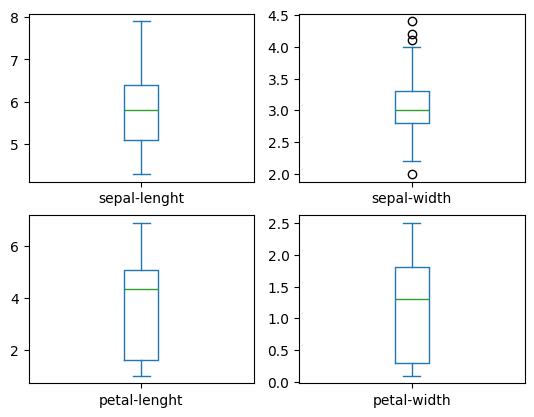

In [10]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

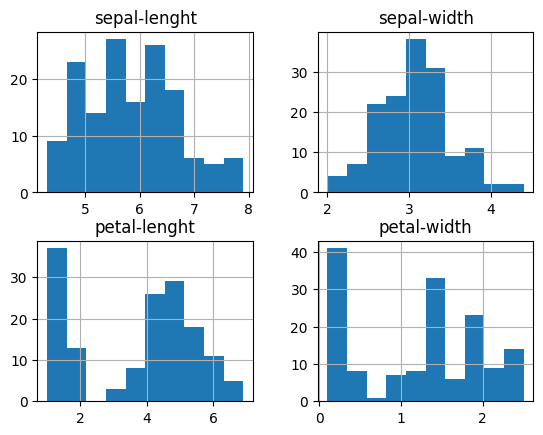

In [11]:
dataset.hist()
plt.show()

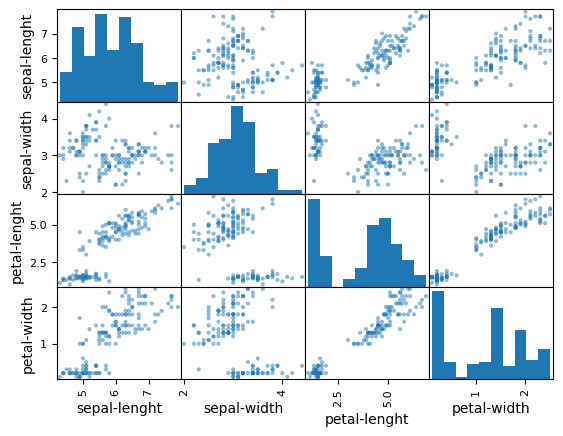

In [12]:
scatter_matrix(dataset)
plt.show()

In [13]:
array = dataset.values
X = array[:, 0:4]  # assuming the first 4 columns are features
Y = array[:, 4]    # assuming the last column is the target variable

validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Rishav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rishav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.950000 (0.055277)
CART: 0.933333 (0.081650)
NB: 0.966667 (0.040825)
SVM: 0.950000 (0.040825)
